# Spam Email Detection Using Scikit-Learn

A simple ML model to classify messages as spam or not spam.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
# Load the dataset
df = pd.read_csv('spam_dataset.csv')
df.columns = ['label', 'message']
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})
df.head()

,label,message,label_num
0,ham,"Hey, are we still meeting today?",0
1,spam,Congratulations! You have won a free ticket. C...,1
2,ham,Don’t forget to bring your assignment.,0
3,spam,Win $1000 cash now by clicking this link.,1
4,ham,Let’s catch up soon over coffee.,0


In [11]:
# Data split
X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Vectorization
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [13]:
# Model training
model = MultinomialNB()
model.fit(X_train_counts, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Confusion Matrix:
 [[0 0]
 [1 0]]


C:\Users\devga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\devga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\devga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

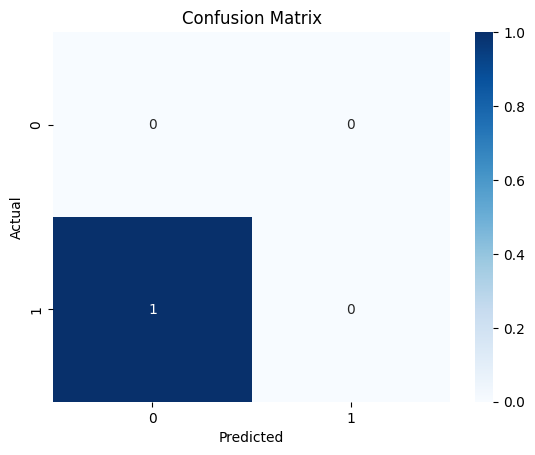

In [14]:
y_pred = model.predict(X_test_counts)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Sample test
sample = ["You have won $500 cash! Claim now!"]
sample_counts = vectorizer.transform(sample)
print('Spam' if model.predict(sample_counts)[0] else 'Not Spam')

Spam
